In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
    
from sklearn import preprocessing
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
from collections import Counter

In [3]:
data_16 = pd.read_csv(r'C:\Users\D-Shield\Documents\Proyecto Delfín\Datos violencia\2020\Datos_entidades\Municipios2016.csv', 
                      encoding = 'utf8')

data_17 = pd.read_csv(r'C:\Users\D-Shield\Documents\Proyecto Delfín\Datos violencia\2020\Datos_entidades\Municipios2017.csv',
                      encoding = 'utf8')

data_18 = pd.read_csv(r'C:\Users\D-Shield\Documents\Proyecto Delfín\Datos violencia\2020\Datos_entidades\Municipios2018.csv', 
                      encoding = 'utf8')

data_19 = pd.read_csv(r'C:\Users\D-Shield\Documents\Proyecto Delfín\Datos violencia\2020\Datos_entidades\Municipios2019.csv', 
                      encoding = 'utf8')

In [5]:
def delitos_1mes(data):
    x = data[data.Entidad == 'Jalisco'].loc[data['Municipio'].isin(['Guadalajara', 'Zapopan',
                                            "San Pedro Tlaquepaque", "Tonalá", 
                                            'Tlajomulco de Zúñiga', 'El Salto ',
                                            'Ixtlahuacán de los Membrillos','Juanacatlán'])]

    x['Delito'] = x[['Subtipo de delito', 'Modalidad']].apply(lambda c: ''.join(c), axis=1)
    y = x.set_index(['Delito'])
    y.drop(y.iloc[:, 0:8], inplace = True, axis = 1)
    return y.drop(y.iloc[:, 0:12], axis = 1).groupby(level=-1, axis=0).sum()

def delitos_2mes(data):
    x = data[data.Entidad == 'Jalisco'].loc[data['Municipio'].isin(['Guadalajara', 'Zapopan',
                                            "San Pedro Tlaquepaque", "Tonalá", 
                                            'Tlajomulco de Zúñiga', 'El Salto ',
                                            'Ixtlahuacán de los Membrillos','Juanacatlán'])]

    x['Delito'] = x[['Subtipo de delito', 'Modalidad']].apply(lambda c: ''.join(c), axis=1)
    y = x.set_index(['Delito'])
    y.drop(y.iloc[:, 0:8], inplace = True, axis = 1)
    return y.drop(y.iloc[:, 0:11], axis = 1).groupby(level=-1, axis=0).sum()


def delitos2_1mes(data):
    x = data[data.Entidad == 'Jalisco'].loc[data['Municipio'].isin(['Guadalajara', 'Zapopan',
                                                "San Pedro Tlaquepaque", "Tonalá", 
                                                'Tlajomulco de Zúñiga', 'El Salto ',
                                                'Ixtlahuacán de los Membrillos', 'Juanacatlán'])]
    x['Delito'] = x[['Subtipo de delito', 'Modalidad']].apply(lambda c: ''.join(c), axis=1)

    y = x.set_index(['Delito'])
    y.drop(y.iloc[:, 0:8], inplace = True, axis = 1)
    return y.drop(y.iloc[:, 12:13], axis = 1).groupby(level=-1, axis=0).sum()

def delitos2_2mes(data):
    x = data[data.Entidad == 'Jalisco'].loc[data['Municipio'].isin(['Guadalajara', 'Zapopan',
                                                "San Pedro Tlaquepaque", "Tonalá", 
                                                'Tlajomulco de Zúñiga', 'El Salto ',
                                                'Ixtlahuacán de los Membrillos', 'Juanacatlán'])]
    x['Delito'] = x[['Subtipo de delito', 'Modalidad']].apply(lambda c: ''.join(c), axis=1)

    y = x.set_index(['Delito'])
    y.drop(y.iloc[:, 0:8], inplace = True, axis = 1)
    return y.drop(y.iloc[:, 11:13], axis = 1).groupby(level=-1, axis=0).sum()


def homicidiosZMG(data):
    x = data[data.Entidad == 'Jalisco'].loc[data['Municipio'].isin(['Guadalajara'])]
    hom = x.loc[x['Subtipo de delito'].isin(['Homicidio doloso'])]
    af = hom.loc[hom['Modalidad'].isin(['Con arma de fuego'])].set_index(['Tipo de delito'])
    return af.drop(af.iloc[:, 0:8], axis = 1).groupby(level=-1, axis=0).sum()


In [6]:
def nombres_1mes (data1, data2):
    return data1.rename(columns = {'Enero' : '2', 'Febrero': '3', 'Marzo': '4',
                       'Abril': '5', 'Mayo': '6', 'Junio': '7', 'Julio': '8',
                       'Agosto': '9', 'Septiembre': '10', 'Octubre': '11', 'Noviembre': '12',
                       'Diciembre': '1'}, inplace = True)

    return data2.rename(columns = {'Enero' : '1', 'Febrero': '2', 'Marzo': '3',
                       'Abril': '4', 'Mayo': '5', 'Junio': '6', 'Julio': '7',
                       'Agosto': '8', 'Septiembre': '9', 'Octubre': '10', 'Noviembre': '11',
                         'Diciembre': '12'}, inplace = True)

def nombres_2mes(data1, data2):
    return data1.rename(columns = {'Enero' : '3', 'Febrero': '4', 'Marzo': '5',
                       'Abril': '6', 'Mayo': '7', 'Junio': '8', 'Julio': '9',
                       'Agosto': '10', 'Septiembre': '11', 'Octubre': '12', 'Noviembre': '1',
                       'Diciembre': '2'}, inplace = True)
    return data2.rename(columns = {'Enero' : '1', 'Febrero': '2', 'Marzo': '3',
                       'Abril': '4', 'Mayo': '5', 'Junio': '6', 'Julio': '7',
                       'Agosto': '8', 'Septiembre': '9', 'Octubre': '10', 'Noviembre': '11',
                         'Diciembre': '12'}, inplace = True)



In [7]:
def correlaciones(data1, data2):
    x = pd.concat([data1, data2]).transpose()
    return x.loc[:, (x != 0).any(axis = 0)].corr(method = 'spearman')

def mas_positivos(data, perc = 0.25):
    return data.head(int(len(data)*(perc)))

def mas_negativos(data, perc = 0.25):
    return data.tail(int(len(data)*(perc)))

def corr_25 (data):
    x = pd.DataFrame(data.Homicidio).sort_values('Homicidio', ascending = False)
    x.drop(x.iloc[:, 0:1], inplace = True, axis = 0)
    y = pd.concat([mas_positivos(x), mas_negativos(x)])
    plt.figure(figsize = (12, 12))
    return sns.heatmap(y, annot=True, fmt="g", cmap='viridis', xticklabels = True, yticklabels = True,
                  vmin = -1, vmax = 1)

def data_corr(data):
    x = pd.DataFrame(data.Homicidio).sort_values('Homicidio', ascending = False)
    x.drop(x.iloc[:, 0:1], inplace = True, axis = 0)
    return pd.concat([mas_positivos(x), mas_negativos(x)])

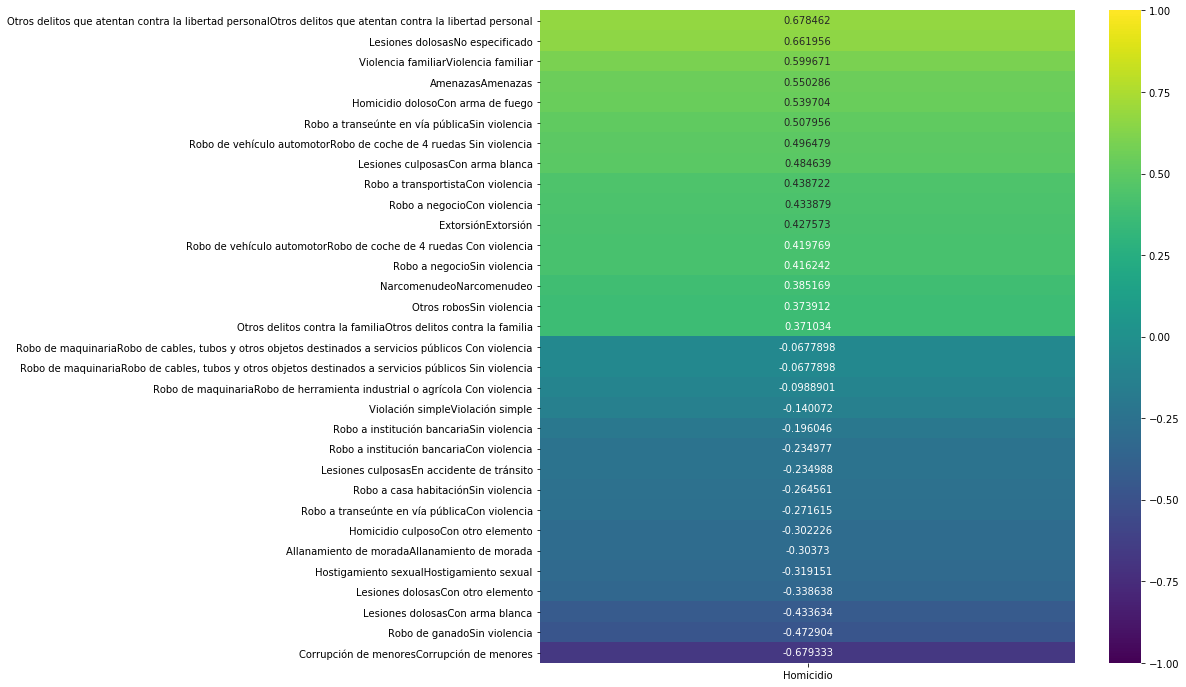

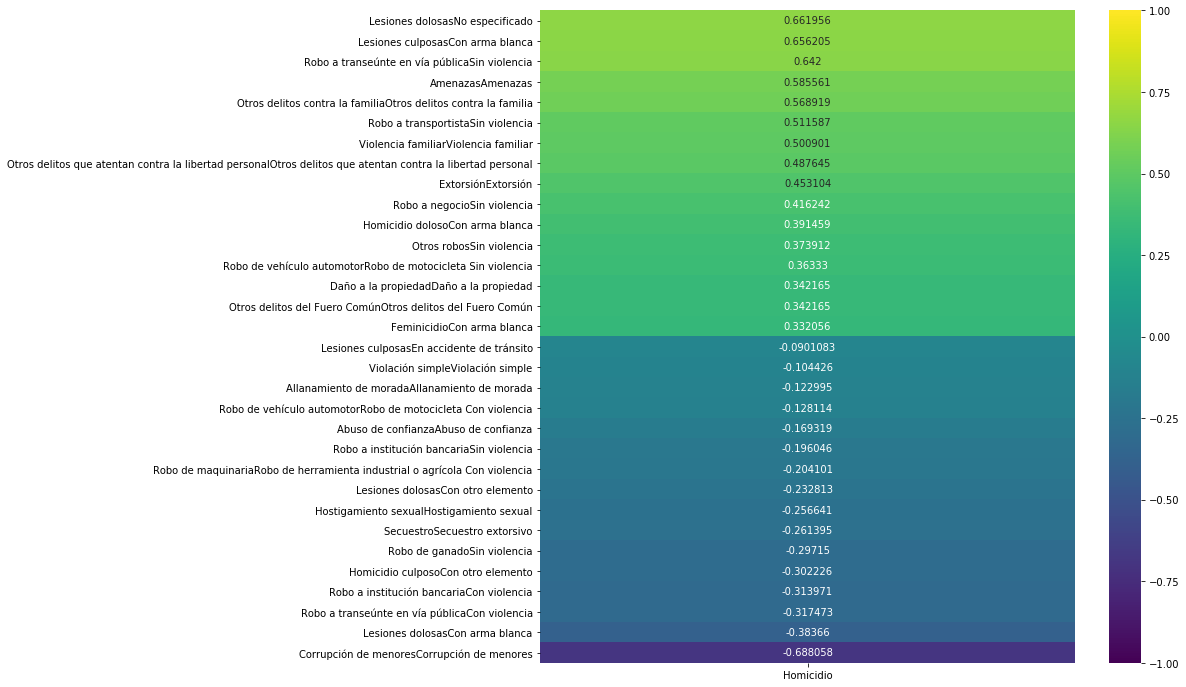

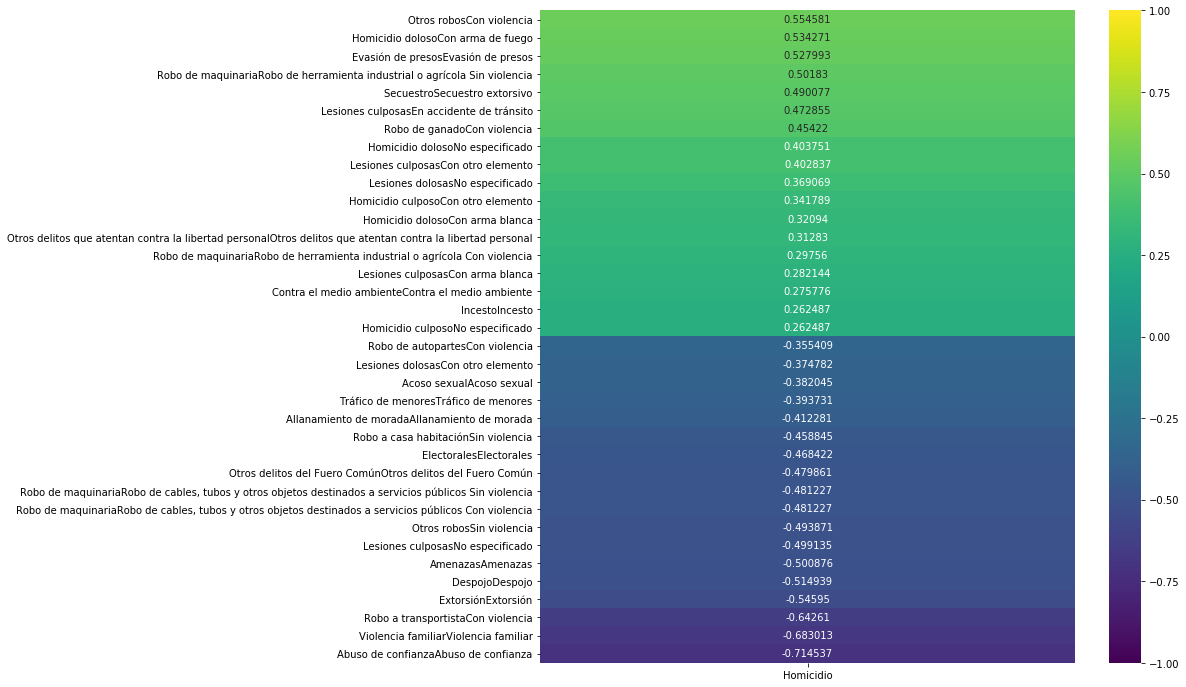

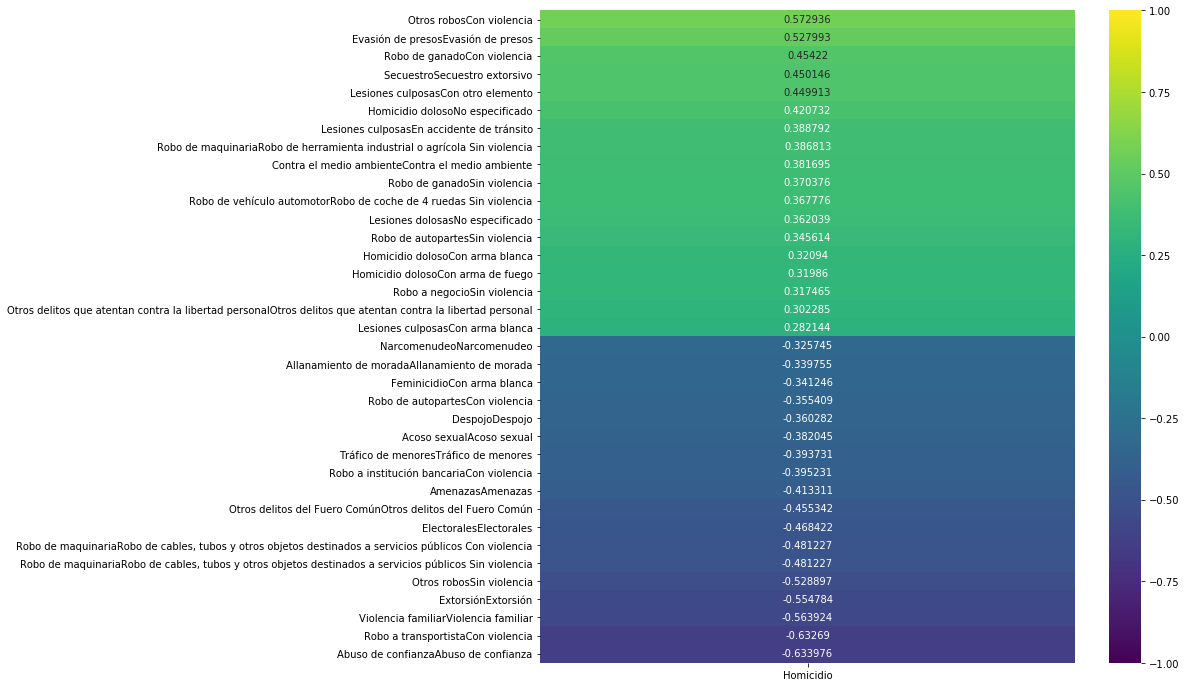

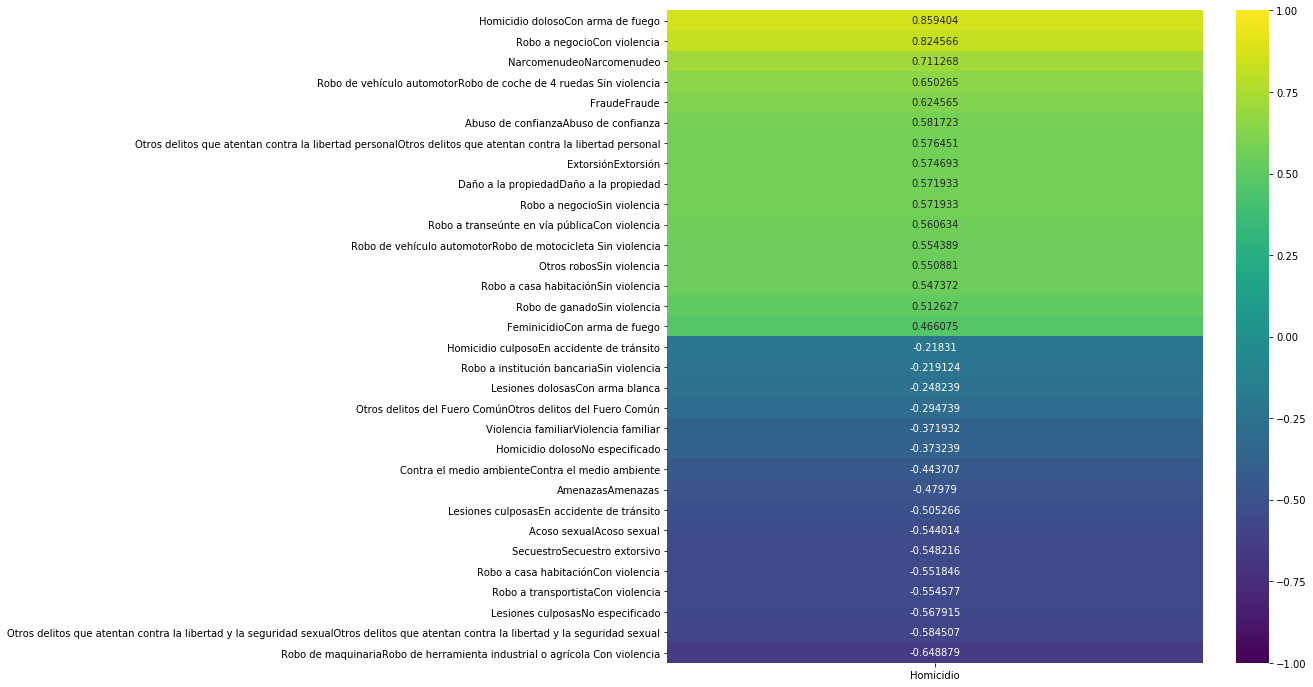

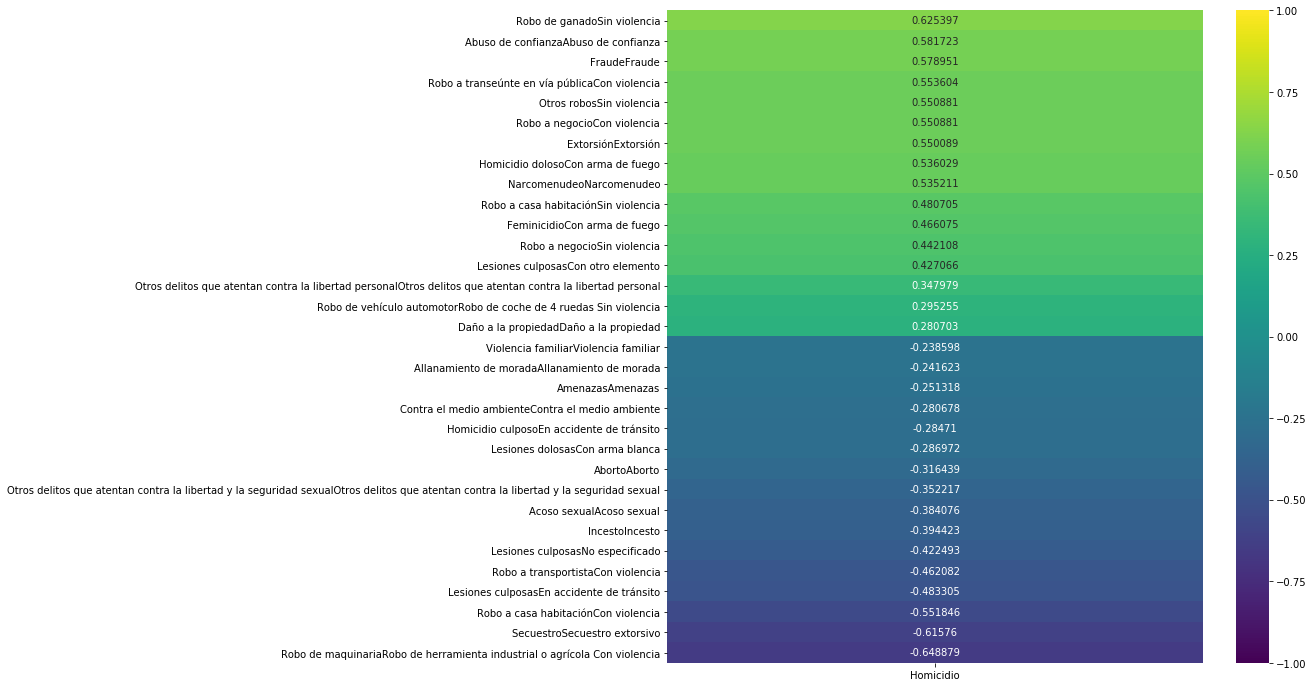

In [8]:
data1mes17 = pd.concat([delitos_1mes(data_16), delitos2_1mes(data_17)], axis = 'columns')
data2meses17 = pd.concat([delitos_2mes(data_16), delitos2_2mes(data_17)], axis = 'columns')

data1mes18 = pd.concat([delitos_1mes(data_17), delitos2_1mes(data_18)], axis = 'columns')
data2meses18 = pd.concat([delitos_2mes(data_17), delitos2_2mes(data_18)], axis = 'columns')

data1mes19 = pd.concat([delitos_1mes(data_18), delitos2_1mes(data_19)], axis = 'columns')
data2meses19 = pd.concat([delitos_2mes(data_18), delitos2_2mes(data_19)], axis = 'columns')

a = corr_25(correlaciones(data1mes17, homicidiosZMG(data_17)))
b = corr_25(correlaciones(data2meses17, homicidiosZMG(data_17)))
c = corr_25(correlaciones(data1mes18, homicidiosZMG(data_18)))
d = corr_25(correlaciones(data2meses18, homicidiosZMG(data_18)))
e = corr_25(correlaciones(data1mes19, homicidiosZMG(data_19)))
f = corr_25(correlaciones(data2meses19, homicidiosZMG(data_19)))

In [9]:
g = data_corr(correlaciones(data1mes17, homicidiosZMG(data_17)))
h = data_corr(correlaciones(data2meses17, homicidiosZMG(data_17)))
i = data_corr(correlaciones(data1mes18, homicidiosZMG(data_18)))
j = data_corr(correlaciones(data2meses18, homicidiosZMG(data_18)))
k = data_corr(correlaciones(data1mes19, homicidiosZMG(data_19)))
l = data_corr(correlaciones(data2meses19, homicidiosZMG(data_19)))

m = pd.concat([g, h, i, j, k, l])

In [10]:
n = m.drop(m.iloc[:, 0:1], axis = 1)
#n = n.reset_index().values.tolist()
n = n.reset_index()
l = n['index'].values.tolist()
lista = Counter(l).most_common(20)

In [11]:
def delitos(data):
    x = data[data.Entidad == 'Jalisco'].loc[data['Municipio'].isin(['Guadalajara', 'Zapopan',
                                            "San Pedro Tlaquepaque", "Tonalá", 
                                            'Tlajomulco de Zúñiga', 'El Salto ',
                                            'Ixtlahuacán de los Membrillos','Juanacatlán'])]

    x['Delito'] = x[['Subtipo de delito', 'Modalidad']].apply(lambda c: ''.join(c), axis=1)
    y = x.loc[x['Delito'].isin(['Otros delitos que atentan contra la libertad personalOtros delitos que atentan contra la libertad personal',
                             'Violencia familiarViolencia familiar', 'AmenazasAmenazas', 'ExtorsiónExtorsión',
                               'Otros robosSin violencia', 'Lesiones culposasEn accidente de tránsito',
                               'Homicidio dolosoCon arma de fuego', 'Robo a transportistaCon violencia',
                               'Robo a negocioSin violencia', 'Robo de maquinariaRobo de herramienta industrial o agrícola Con violencia',
                               'Allanamiento de moradaAllanamiento de morada', 'Robo de ganadoSin violencia',
                               'Abuso de confianzaAbuso de confianza', 'SecuestroSecuestro extorsivo',
                               'Lesiones dolosasNo especificado', 'Robo de vehículo automotorRobo de coche de 4 ruedas Sin violencia',
                               'Lesiones culposasCon arma blanca', 'Robo de vehículo automotorRobo de coche de 4 ruedas Sin violencia',
                               'Lesiones culposasCon arma blanca', 'NarcomenudeoNarcomenudeo',
                               'Robo a casa habitaciónSin violencia', 'Robo a transeúnte en vía públicaCon violencia'])].set_index(['Delito'])
    return y.drop(y.iloc[:, 0:9], axis = 1).groupby(level=-1, axis=0).sum()



In [13]:
def delitos_norm(data):
    x = delitos(data).max(axis = 1)
    return delitos(data).divide(x, axis = 0)
delitos_norm(data_17).to_csv('Norm17.csv', encoding='utf-8')
delitos_norm(data_18).to_csv('Norm18.csv', encoding='utf-8')
delitos_norm(data_19).to_csv('Norm19.csv', encoding='utf-8')

delitos_norm(data_17)

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
Delito,,,,,,,,,,,,
Abuso de confianzaAbuso de confianza,0.561404,0.672515,0.684211,0.713450,0.690058,0.789474,0.801170,0.748538,0.549708,1.000000,0.836257,0.625731
Allanamiento de moradaAllanamiento de morada,0.685714,0.742857,0.400000,0.428571,0.514286,0.685714,0.742857,0.657143,1.000000,0.628571,0.628571,0.514286
AmenazasAmenazas,0.855153,0.707521,0.789694,0.782730,0.959610,0.948468,0.845404,0.892758,0.928969,1.000000,0.846797,0.688022
ExtorsiónExtorsión,1.000000,0.657143,0.600000,0.571429,0.371429,0.428571,0.400000,0.800000,0.657143,0.885714,0.714286,0.714286
Homicidio dolosoCon arma de fuego,0.787879,0.515152,0.636364,0.530303,0.696970,0.621212,0.681818,0.893939,0.590909,1.000000,0.909091,0.848485
Lesiones culposasCon arma blanca,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.333333
Lesiones culposasEn accidente de tránsito,0.838509,0.701863,0.832298,0.826087,0.838509,0.894410,1.000000,0.956522,0.968944,0.776398,0.788820,1.000000
Lesiones dolosasNo especificado,0.166667,0.291667,0.083333,0.583333,0.687500,0.270833,0.166667,1.000000,0.583333,0.729167,0.625000,0.812500
NarcomenudeoNarcomenudeo,0.751724,0.593103,0.531034,0.482759,0.689655,0.613793,0.703448,0.731034,0.600000,0.731034,0.855172,1.000000
